In [ ]:
# Global Feature Importance and Interpretability of Machine Learning Models Suing SHAP

In [ ]:
!pip install shap

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

import shap


In [ ]:
df = sns.load_dataset('iris')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
# perform label encoding on the species column

le = LabelEncoder()


df['species'] = le.fit_transform(df['species'])


X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']


In [ ]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# create the model

model = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


In [ ]:
# using shap for explainability
# create explainer
explainer = shap.Explainer(model, X_train)

# calculate the shap values for test set, disabling the additivity check
shap_values = explainer(X_test, check_additivity=False)

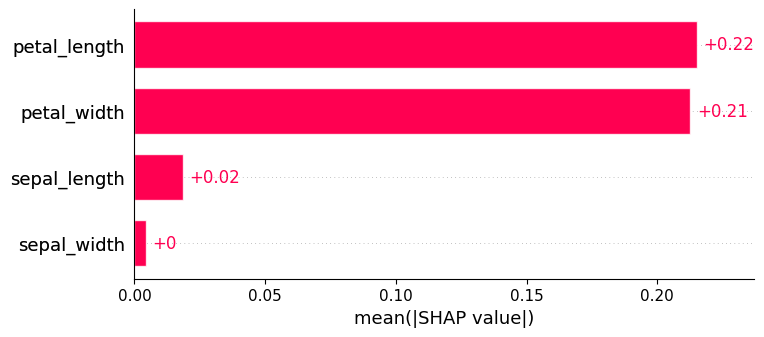

In [ ]:
# Bar plot of feature importances

shap.plots.bar(shap_values[:, :, 0])

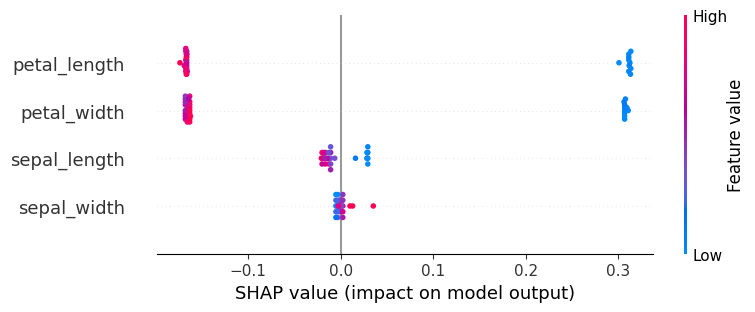

In [ ]:
# Beeswarm plot(detailed view)

shap.plots.beeswarm(shap_values[:, :, 0])

In [ ]:
shap.plots.beeswarm(shap_values)

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!